# Deep Learning
Deep Learning techniques can be used to predict various outcomes including but not limited to future sales. Your task is to create a deep learning model of the Long Short Term Memory which is a type of Recurrent Neural Network .

You can use either Tensorflow or Pytorch libraries for model building. The model should not be very deep (Two layers) due to the computational requirements, it should comfortably run in google colab.

In [3]:
# importing of libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from timeseries import TimeSeries
from modeling import Modeler
sns.set()


In [4]:
train_ = pd.read_csv("../data/cleaned_train.csv")
test = pd.read_csv("../data/cleaned_test.csv")
train_.drop(['DayOfWeek','DayOfYear','WeekOfYear',
            'Customers',"Month","Day"],axis=1,inplace=True)
test.drop(["Id",'DayOfWeek','DayOfYear','WeekOfYear'
           ,"Month","Day"],axis=1,inplace=True)
train=train_.loc[:,train_.columns!='Sales']
train['Sales']=train_['Sales']
train.sort_values(["Year"], ascending=False ,ignore_index=True, inplace=True)
test.sort_values(["Year"], ascending=False ,ignore_index=True, inplace=True)
train.index.name = 'Year'
train = train.set_index('Year')
test.index.name = 'Year'
test = test.set_index('Year')

### Tasks
- Isolate the Rossmann Store Sales dataset into time series data


In [5]:
timeseries = TimeSeries(train)

2022-05-25 12:12:59,088:logger:Initialized the time series class


- Check whether your time Series Data is Stationary

In [6]:
# timeseries.perform_adfuller('Sales')

- Depending on your conclusion from 2 above difference your time series data



In [7]:
train['Sales'] = timeseries.remove_stationarity(train.Sales.values)

- Check for autocorrelation and partial autocorrelation of your data


In [8]:
acfSalesScaled = acf(train.Sales.values, fft=True, nlags=40)
acfSalesScaledArray = np.array(acfSalesScaled)

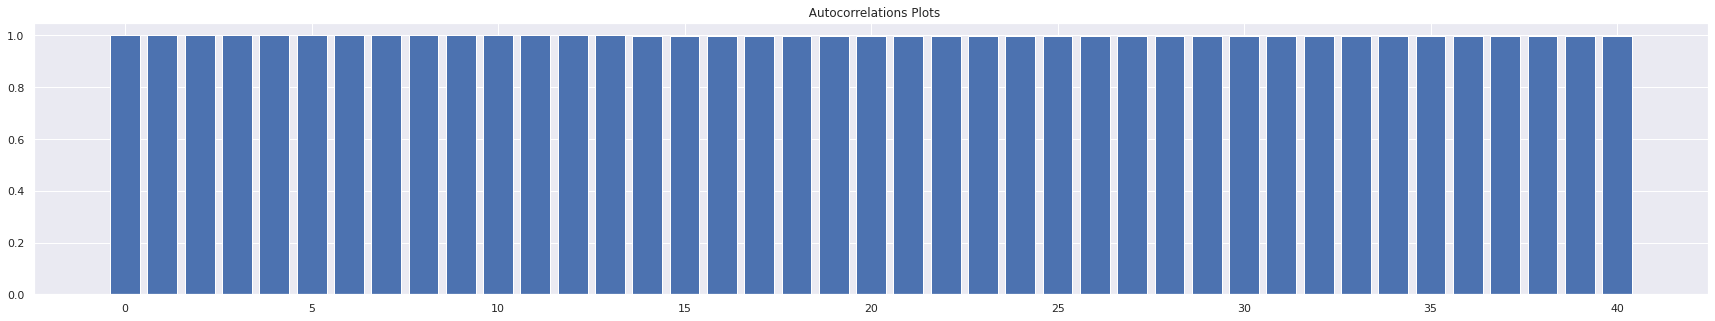

2022-05-25 12:13:17,238:logger:Successfully displayed the autocorelation plots


In [9]:
timeseries.corrPlots(acfSalesScaledArray, '')

- Transform the time series data into supervised learning data by creating a new y(target) column. For example as illustrated here in the Sliding Window For Time Series Data section


In [10]:
SIZE = len(train.Sales)
WINDOW_SIZE = 48
BATCH_SIZE= SIZE-WINDOW_SIZE*2
EPOCHS = 5

- Scale your data in the (-1, 1) range


In [11]:
DatasetTrain = timeseries.split_dataset(train.Sales[0:BATCH_SIZE])
DatasetVal = timeseries.split_dataset(train.Sales[:BATCH_SIZE])

2022-05-25 12:13:29.673567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 12:13:29.673623: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 12:13:29.673659: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin-HP-EliteBook-Folio-9470m): /proc/driver/nvidia/version does not exist
2022-05-25 12:13:30,665:logger:Successfully windowed the dataset
2022-05-25 12:13:30,700:logger:Successfully windowed the dataset


- Build a LSTM Regression model to predict the next sale.

In [12]:
model = timeseries.model()
results = model.fit(DatasetTrain, epochs=EPOCHS, validation_data=DatasetVal, verbose=1)

2022-05-25 12:13:45,613:logger:Successfully modeled the neural network


Epoch 1/5
1621/1621 [==============================] - 231s 137ms/step - loss: 2.8797e-05 - val_loss: 0.0013
Epoch 2/5
1621/1621 [==============================] - 219s 135ms/step - loss: 3.3160e-05 - val_loss: 0.0017
Epoch 3/5
1621/1621 [==============================] - 211s 130ms/step - loss: 4.4802e-05 - val_loss: 0.0018
Epoch 4/5
1621/1621 [==============================] - 209s 129ms/step - loss: 5.6006e-05 - val_loss: 0.0020
Epoch 5/5
1621/1621 [==============================] - 207s 127ms/step - loss: 6.6299e-05 - val_loss: 0.0021


In [ ]:
forecast = timeseries.model_forecast(model, train.Sales.values[:, np.newaxis], WINDOW_SIZE,SIZE=BATCH_SIZE)
results = forecast[BATCH_SIZE-WINDOW_SIZE:-1]
results_ = scaler.inverse_transform(results.reshape(-1,1))
XValid_ = scaler.inverse_transform(XValid.reshape(-1,1))

2022-05-25 12:33:26.727377: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 124484736 exceeds 10% of free system memory.
2022-05-25 12:33:30.958899: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62242368 exceeds 10% of free system memory.
2022-05-25 12:33:33.950560: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62242368 exceeds 10% of free system memory.
2022-05-25 12:33:34.145408: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 41494912 exceeds 10% of free system memory.
2022-05-25 12:33:34.206857: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 41494912 exceeds 10% of free system memory.
2022-05-25 12:33:34.207770: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 41494912 exceeds 10% of free system memory.


In [ ]:
results

In [ ]:
view_forecast_= timeseries.view_forecast(DateValid,XValid_,results_,results,WINDOW_SIZE=48)